# 1. Introduction and Background

In a business related to borrowing funds, the best interest rate in pricing is needed to determine whether the loan is high risk or not. Therefore, some factors need to be analyzed to find the best interest rate for customer.

# 2. Dataset

### Importing Libraries

In [291]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading dataset

In [293]:
df = pd.read_csv('credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Delete loan data of person who have age above 60 years to get the loan data of productive age only

In [294]:
df.drop(df[df['person_age'] >= 60].index, inplace = True)

Delete null data

In [295]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28567 entries, 0 to 32579
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28567 non-null  int64  
 1   person_income               28567 non-null  int64  
 2   person_home_ownership       28567 non-null  object 
 3   person_emp_length           28567 non-null  float64
 4   loan_intent                 28567 non-null  object 
 5   loan_grade                  28567 non-null  object 
 6   loan_amnt                   28567 non-null  int64  
 7   loan_int_rate               28567 non-null  float64
 8   loan_status                 28567 non-null  int64  
 9   loan_percent_income         28567 non-null  float64
 10  cb_person_default_on_file   28567 non-null  object 
 11  cb_person_cred_hist_length  28567 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


Change the loan status information into text

In [296]:
df['loan_status'].mask(df['loan_status'] == 0, 'Not Default', inplace=True)
df['loan_status'].mask(df['loan_status'] == 1, 'Default', inplace=True)

Age distribution

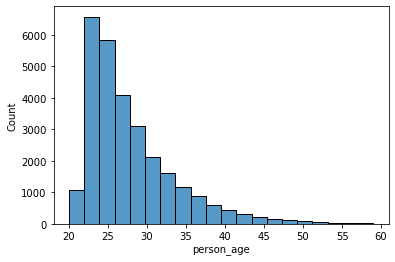

In [298]:
sns.histplot(data=df, x = 'person_age', bins= 20)
plt.show()

Distribution of person home ownership

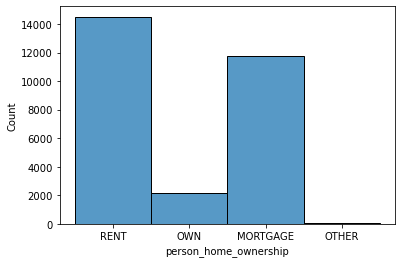

In [299]:
sns.histplot(data=df, x = 'person_home_ownership', bins= 20)
plt.show()

Distribution of loan status

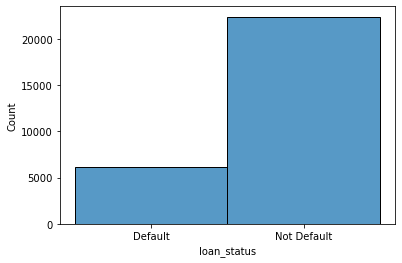

In [301]:
sns.histplot(data=df, x = 'loan_status', bins= 20)
plt.show()

# 3. Performing Statistical Testing

In [281]:
a1 = df.sample(10000, random_state=1)

features = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_percent_income", "cb_person_cred_hist_length"]
model_df = a1[features];
model_df["loan_int_rate"] = a1["loan_int_rate"];
model_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19192\1363792257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["loan_int_rate"] = a1["loan_int_rate"];


,person_age,person_income,person_emp_length,loan_amnt,loan_percent_income,cb_person_cred_hist_length,loan_int_rate
24115,29,70000,6.0,4200,0.06,9,10.99
10903,24,70000,8.0,4800,0.07,2,11.36
14213,22,48000,0.0,14400,0.30,2,13.49
23167,35,40000,6.0,5100,0.13,5,13.72
20844,27,43495,3.0,10800,0.25,6,10.99
...,...,...,...,...,...,...,...
26973,31,120000,15.0,7500,0.06,9,10.99
5827,24,47000,0.0,12000,0.26,3,13.49
24742,29,75000,1.0,12000,0.16,6,9.63
7506,25,70000,5.0,6800,0.10,2,5.42


In [282]:
import statsmodels.api as sm

y_train = model_df.pop('loan_int_rate').astype(float);
X_train = model_df;
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          loan_int_rate   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     58.38
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           2.50e-71
Time:                        16:21:57   Log-Likelihood:                -25697.
No. Observations:               10000   AIC:                         5.141e+04
Df Residuals:                    9993   BIC:                         5.146e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# 4. Building Regression Model

### Loan Interest Rate vs Loan Amount

In [283]:
from sklearn.linear_model import LinearRegression

x = np.array(X_train["loan_amnt"].values).reshape((-1, 1))
y = y_train

In [284]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [285]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.024327779455056264
intercept: 10.261189122308403
slope: [7.8407367e-05]


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


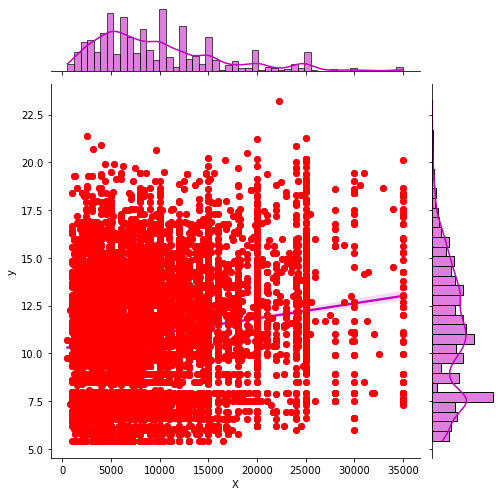

In [286]:
df_train = pd.DataFrame(dict(X=x.ravel(), y=y))
g = sns.jointplot("X", "y", data=df_train, kind="reg", color="m", height=7)
g.ax_joint.plot(x, y, 'ro');

### Loan Interest Rate vs Person Employee Lenght

In [287]:
from sklearn.linear_model import LinearRegression

x = np.array(X_train["person_emp_length"].values).reshape((-1, 1))
y = y_train

In [288]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [289]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.003387934486384858
intercept: 11.234678107906554
slope: [-0.04473294]


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


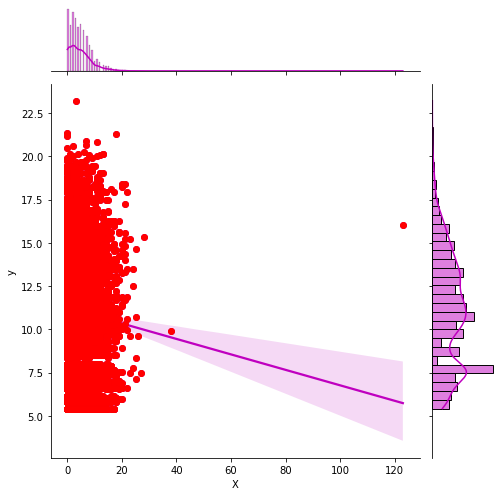

In [290]:
df_train = pd.DataFrame(dict(X=x.ravel(), y=y))
g = sns.jointplot("X", "y", data=df_train, kind="reg", color="m", height=7)
g.ax_joint.plot(x, y, 'ro');